## Exercise 4.7 - Jack's Car Rental

Write a program for policy iteration and re-solve Jack’s car rental problem with the following
changes. One of Jack’s employees at the first location rides a bus home each night and lives
near the second location. She is happy to shuttle one car to the second location for free.
Each additional car still costs \$2, as do all cars moved in the other direction. In addition,
Jack has limited parking space at each location. If more than 10 cars are kept overnight at a
location (after any moving of cars), then an additional cost of \$4 must be incurred to use a
second parking lot (independent of how many cars are kept there). These sorts of
nonlinearities and arbitrary dynamics often occur in real problems and cannot easily be handled
by optimization methods other than dynamic programming. To check your program, first replicate
the results given for the original problem. 

In [1]:
! pip3 -q install numpy scipy matplotlib gym

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mdp import policy_iteration
from rental import JacksCarRental, NonlinearJacksCarRental

### Jack's Car Rental MDP

In [3]:
mdp = JacksCarRental()

days = 365
rewards = np.zeros(days, dtype=np.int)
actions = np.zeros(days, dtype=np.int)
states = np.zeros([days, len(mdp.observation_space.nvec)], dtype=np.int)

mdp.reset()
for day in range(days):
    action = mdp.action_space.sample()
    state, reward, done, info = mdp.step(action)
    rewards[day] = reward
    actions[day] = action
    states[day] = state

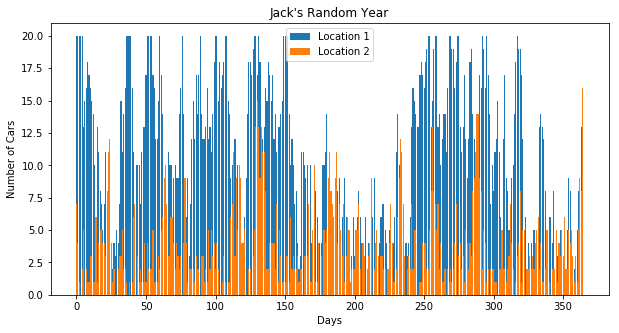

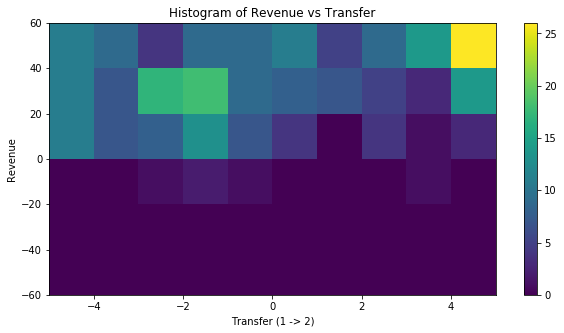

In [4]:
matplotlib.rcParams['figure.figsize'] = [10, 5]

plt.figure()
plt.title("Jack's Random Year")
plt.ylabel("Number of Cars")
plt.xlabel("Days")
z0 = plt.bar(range(days), states[:, 0], label="Location 1")
z1 = plt.bar(range(days), states[:, 1], label="Location 2")
plt.legend()

plt.figure()
plt.title("Histogram of Revenue vs Transfer")
plt.ylabel("Revenue")
plt.xlabel("Transfer (1 -> 2)")
z = plt.hist2d(actions - mdp.max_transfer, rewards, bins=[mdp.action_space.n - 1, 6],
               range=[[-mdp.max_transfer, +mdp.max_transfer], [-60, +60]])
plt.colorbar()

#### Performance Benchmark

In [5]:
mdp = JacksCarRental(max_poisson=30)
%timeit mdp.step(mdp.action_space.sample())

mdp = JacksCarRental(max_poisson=20)
%timeit mdp.step(mdp.action_space.sample())

mdp = JacksCarRental(max_poisson=10)
%timeit mdp.step(mdp.action_space.sample())

35.4 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.65 ms ± 55 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
334 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Reproduction of Figure 4.2

In [6]:
def plot_results(value, policy):
    if policy is not None:
        plt.figure()
        plt.title("Policy")
        plt.ylabel("Cars at Location 1")
        plt.xlabel("Cars at Location 2")
        plt.imshow(policy - mdp.max_transfer, origin='lower',
                   vmin=-mdp.max_transfer, vmax=+mdp.max_transfer)
        plt.colorbar()  
    
    if value is not None:
        plt.figure()
        plt.title("Value Function")
        plt.ylabel("Cars at Location 1")
        plt.xlabel("Cars at Location 2")
        plt.imshow(value, origin='lower')
        plt.colorbar()

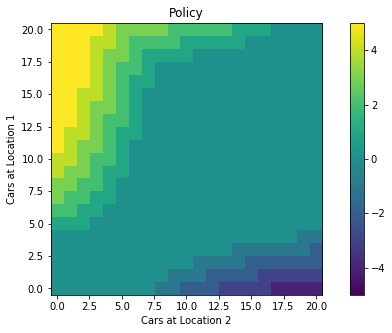

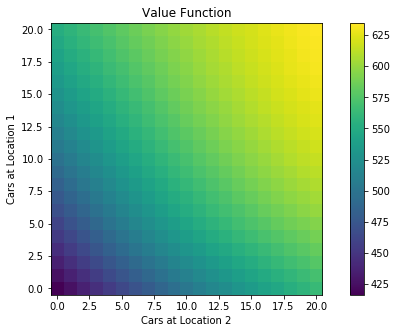

In [7]:
mdp = JacksCarRental()
value, policy = policy_iteration(mdp)
plot_results(value, policy)

### Non-Linear Jack's Car Rental Optimal Policy and Value Function

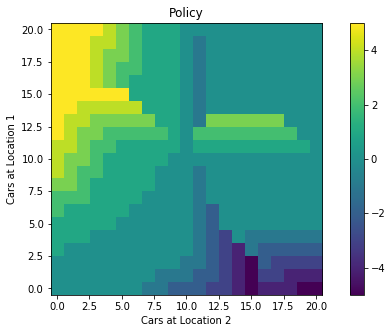

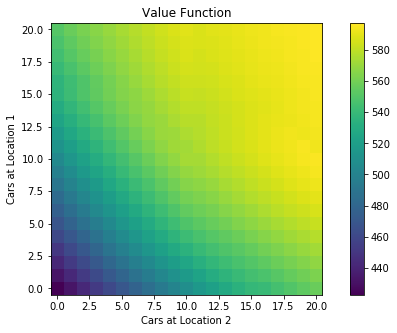

In [8]:
mdp = NonlinearJacksCarRental()
value, policy = policy_iteration(mdp)
plot_results(value, policy)